<a href="https://colab.research.google.com/drive/1oHMlBfE4Vd8WST88cPegtQI5HMCjCAAZ#scrollTo=iMweqBVt7dUD" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [1]:
# Instalar las bibliotecas necesarias
!pip install transformers
!pip install torch
!pip install pydub
!pip install speechrecognition
!pip install keybert
!pip install sentencepiece
!pip install chardet # para usar luego import chardet
!pip install rake-nltk
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 4.0 MB/s eta 0:00:00


In [2]:
# Importar librerías necesarias
from google.colab import files
import speech_recognition as sr
from pydub import AudioSegment
#from transformers import pipeline
from google.colab import files
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from keybert import KeyBERT
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
# Subir archivo de audio
uploaded = files.upload()

Saving Grabación (3) (1).m4a to Grabación (3) (1).m4a


In [4]:
# Obtener el nombre del archivo subido
input_file = list(uploaded.keys())[0]
print(input_file)

Grabación (3) (1).m4a


In [5]:
# Convertir el archivo de audio a formato .wav
output_file = 'archivo_convertido.wav'
audio = AudioSegment.from_file(input_file) #Convierte el archivo mp3 a wav (mejor calidad de audio y mas opciones de edición, conservando la calidad)
audio.export(output_file, format="wav") #Deja el archivo convertido

# Archivo de salida para guardar la transcripción
output_txt = "transcripcion.txt"

print(audio.export(output_file,format="wav"))
print(output_file)
print(audio)
print(output_txt)

<_io.BufferedRandom name='archivo_convertido.wav'>
archivo_convertido.wav
transcripcion.txt


In [11]:
# Configurar el reconocimiento de voz
recognizer = sr.Recognizer()
print(recognizer)

In [12]:
# Transcribir el archivo de audio
try:
  # Indented block after 'try' statment
  with sr.AudioFile(output_file) as source:
    audio_data = recognizer.record(source)
    try:
       # Reconocer el texto en español
        text = recognizer.recognize_google(audio_data, language='es-ES')  # Cambia el idioma si es necesario
        print("Transcripción del audio:", text)

        # Guardar la transcripción en un archivo .txt
        #This line was previously incorrectly indented. It's now aligned with the print statement above it.
        with open(output_txt, "w", encoding="utf-8") as file:
            file.write(text)
        print(f"Transcripción guardada en: {output_txt}")
    except sr.UnknownValueError:
        print("No se pudo entender el audio")
    except sr.RequestError as e:
        print(f"Error al realizar la solicitud: {e}")
except Exception as e:
    print(f"Error inesperado: {e}")
except FileNotFoundError:
  print(f"El archivo {output_file} no se encontró.")

Transcripción del audio: cómo está es separarlos en días porque hasta que dure la investigación Yo tampoco le puedo decir a él que no vaya nunca a la oficina entonces lo que se toma la medida de resguardo que se tomó y que esté formada la inspección es que tú vas los días miércoles y los viernes y él va a los días martes solamente Sí ya lo que pasa es que por ejemplo Andrés la semana pasada anunció que nos cambiaron de horario de los martes hasta el miércoles a los martes me entienden Pero y Andrés me dijo me llamó Recién me dijo que no fuera los martes que solamente tenía que ir a los viernes a la oficina mientras dure la investigación para no juntarse porque yo no puedo tampoco si bien está todo en investigación y todos estamos tratando de protegerte lo máximo a ti tampoco puedo vulnerar los derechos de él Hasta que Eh me diga la situación que lo tengo que echar o que tengo que tomar otra medida de resguardo adicional entonces para separarlos defunciones sí De nuevo se juntan los día

In [13]:
# Leer el contenido de subtitulos.txt
input_file = "transcripcion.txt"
with open(input_file, "r") as f:
    contenido = f.read()

In [14]:
# Cargar el modelo y el tokenizador de mrm8488/bert2bert_shared-spanish-finetuned-summarization
tokenizer = AutoTokenizer.from_pretrained("mrm8488/bert2bert_shared-spanish-finetuned-summarization")
model = AutoModelForSeq2SeqLM.from_pretrained("mrm8488/bert2bert_shared-spanish-finetuned-summarization")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.51k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/555M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.bert.modeling_bert.BertModel'> is overwritten by shared encoder config: BertConfig {
  "_name_or_path": "dccuchile/bert-base-spanish-wwm-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.46.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 31002
}

Config of the decoder: <class 'transformers.models.bert.modeling_bert.BertLMHeadModel'> is overwritten by shared decoder config: BertConfig {
  "_name_or_path": "dccuchile/bert-base-span

In [15]:
# Tokenizar el contenido y generar el resumen
inputs = tokenizer(contenido, return_tensors="pt", max_length=512, truncation=True) #max_lenght esta reducido por tiempo de procesamiento, se puede hacer mas largo para archivos mas largos.
summary_ids = model.generate(inputs.input_ids, max_length=300, min_length=60, length_penalty=1.8, num_beams=6, no_repeat_ngram_size=3, do_sample=True, temperature=1.0, early_stopping=True)
resumen = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [16]:
# Inicializar KeyBERT para extracción de puntos clave
kw_model = KeyBERT(model='sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
# Extraer los puntos clave
puntos_clave = kw_model.extract_keywords(
    contenido,
    keyphrase_ngram_range=(1, 2), # Frases de 1 a 2 palabras
    use_maxsum=True,              # Activar máxima relevancia
    nr_candidates=20,             # Número de candidatos a evaluar
    top_n=20                      # Número de puntos clave finales
)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [17]:
#Limpieza de stopwords en puntos_clave

# Obtener el conjunto de stopwords en español
stop_words = set(stopwords.words('spanish'))
custom_stopwords = set(['eh', 'ehm','okay'])  # Agregar palabras específicas.
stop_words.update(custom_stopwords)

# Limpiar stopwords de las frases
puntos_clave_depurados = []
for phrase, score in puntos_clave:
    # Dividir la frase en palabras y eliminar las stopwords
    words = phrase.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Si después de filtrar hay palabras, agregar la frase reconstruida y su puntuación
    if filtered_words:
        puntos_clave_depurados.append((' '.join(filtered_words), score))

# Mostrar resultado
print("Palabras clave originales:", puntos_clave)
print("Palabras clave limpias:", puntos_clave_depurados)


Palabras clave originales: [('miércoles los', 0.4003), ('semana', 0.4008), ('semana pasada', 0.402), ('hay día', 0.4046), ('martes eh', 0.4064), ('días miércoles', 0.4087), ('semana ya', 0.4109), ('la semana', 0.4117), ('martes entienden', 0.4122), ('los días', 0.4147), ('días martes', 0.4187), ('días porque', 0.4281), ('martes hasta', 0.4328), ('ir día', 0.4397), ('horario', 0.4465), ('días que', 0.4494), ('en días', 0.4674), ('horario los', 0.4794), ('cambiaron horario', 0.4913), ('separación días', 0.5149)]
Palabras clave limpias: [('miércoles', 0.4003), ('semana', 0.4008), ('semana pasada', 0.402), ('día', 0.4046), ('martes', 0.4064), ('días miércoles', 0.4087), ('semana', 0.4109), ('semana', 0.4117), ('martes entienden', 0.4122), ('días', 0.4147), ('días martes', 0.4187), ('días', 0.4281), ('martes', 0.4328), ('ir día', 0.4397), ('horario', 0.4465), ('días', 0.4494), ('días', 0.4674), ('horario', 0.4794), ('cambiaron horario', 0.4913), ('separación días', 0.5149)]


In [18]:
print(puntos_clave_depurados)

[('miércoles', 0.4003), ('semana', 0.4008), ('semana pasada', 0.402), ('día', 0.4046), ('martes', 0.4064), ('días miércoles', 0.4087), ('semana', 0.4109), ('semana', 0.4117), ('martes entienden', 0.4122), ('días', 0.4147), ('días martes', 0.4187), ('días', 0.4281), ('martes', 0.4328), ('ir día', 0.4397), ('horario', 0.4465), ('días', 0.4494), ('días', 0.4674), ('horario', 0.4794), ('cambiaron horario', 0.4913), ('separación días', 0.5149)]


In [19]:
# Mostrar resultados
print("\nResumen:")
print(resumen)
print("\nPuntos clave:")
for i, (punto, score) in enumerate(puntos_clave_depurados, 1):
    print(f"{i}. {punto} (relevancia: {score:.2f})")


Resumen:
La decisión de la semana pasada de cambiar de horario de los martes es una medida de resguardo para que esté bien claro ya okay la primera es el tema de ayuda psicológica para que tú pueda superar el tema lo más rápido posible y la segunda es división de los días sea el viernes y el miércoles

Puntos clave:
1. miércoles (relevancia: 0.40)
2. semana (relevancia: 0.40)
3. semana pasada (relevancia: 0.40)
4. día (relevancia: 0.40)
5. martes (relevancia: 0.41)
6. días miércoles (relevancia: 0.41)
7. semana (relevancia: 0.41)
8. semana (relevancia: 0.41)
9. martes entienden (relevancia: 0.41)
10. días (relevancia: 0.41)
11. días martes (relevancia: 0.42)
12. días (relevancia: 0.43)
13. martes (relevancia: 0.43)
14. ir día (relevancia: 0.44)
15. horario (relevancia: 0.45)
16. días (relevancia: 0.45)
17. días (relevancia: 0.47)
18. horario (relevancia: 0.48)
19. cambiaron horario (relevancia: 0.49)
20. separación días (relevancia: 0.51)


In [20]:
# Guardar el resumen y puntos clave en un archivo de salida
from docx import Document

# Crear un documento Word
doc = Document()

# Agregar el resumen
doc.add_heading("Resumen", level=1)
doc.add_paragraph(resumen)

# Agregar los puntos clave
doc.add_heading("Puntos clave", level=1)
for i, (punto, score) in enumerate(puntos_clave_depurados, 1):
    doc.add_paragraph(f"{i}. {punto} (relevancia: {score:.2f})")

# Guardar el documento
output_file = "resumen_puntos_clave.docx"
doc.save(output_file)

print(f"Resumen y puntos clave guardados en {output_file}")

Resumen y puntos clave guardados en resumen_puntos_clave.docx


In [21]:
# Descargar el archivo de resumen y puntos clave
files.download("resumen_puntos_clave.docx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Esta sección del código tiene como propósito explorar posibles implementaciones futuras que permitan desarrollar herramientas de análisis más robustas, complementando las funcionalidades actuales de resumen y puntos clave.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


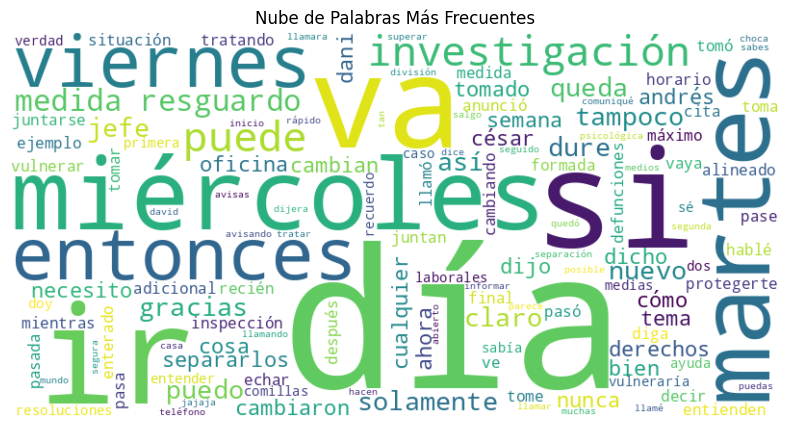

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Descargar stopwords (si no están disponibles)
nltk.download('stopwords')

# Configurar stopwords en español
stop_words = set(stopwords.words('spanish'))
custom_stopwords = set(['eh', 'ehm', 'okay'])  # Agregar palabras específicas.
stop_words.update(custom_stopwords)

# Cargar el archivo de texto
file_path = "transcripcion.txt"
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Limpiar texto eliminando stopwords
words = [word.lower() for word in text.split() if word.isalpha()]  # Solo palabras alfabéticas
filtered_text = " ".join(word for word in words if word not in stop_words)

# Generar la nube de palabras
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words,
    colormap='viridis'
).generate(filtered_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras Más Frecuentes')
plt.show()

In [24]:

# Generar la nube de palabras
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words,
    colormap='viridis'
).generate(puntos_clave_depurados)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras Más Frecuentes')
plt.show()

TypeError: expected string or bytes-like object

In [25]:
print(filtered_text)

cómo separarlos días dure investigación tampoco puedo decir vaya nunca oficina entonces toma medida resguardo tomó formada inspección vas días miércoles viernes va días martes solamente pasa ejemplo andrés semana pasada anunció cambiaron horario martes miércoles martes entienden andrés dijo llamó recién dijo martes solamente ir viernes oficina mientras dure investigación juntarse puedo tampoco si bien investigación tratando protegerte máximo tampoco puedo vulnerar derechos diga situación echar tomar medida resguardo adicional entonces separarlos defunciones nuevo juntan días martes ir martes día viernes dicho cómo cambiaron días hablé ahora césar alineado césar jefe final jefe jefes entonces si cambiando días ve medida resguardo cita día va necesito enterado medida resguardo tomado puedes ir días va ir días vas pase pasó día viernes entonces así queda dure investigación después tome resoluciones caso si si vulneraría comillas derechos laborales sé si doy entender sabía verdad nunca dic

In [26]:
!pip install textblob

In [27]:
from textblob import TextBlob

# Leer el archivo de texto
file_path = "transcripcion.txt"
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Dividir el texto en oraciones (opcional)
blob = TextBlob(text)
sentences = blob.sentences

# Analizar el sentimiento de cada oración
sentiment_results = []
for sentence in sentences:
    polarity = sentence.sentiment.polarity  # Polaridad (-1 a 1)
    subjectivity = sentence.sentiment.subjectivity  # Subjetividad (0 a 1)
    sentiment_results.append((str(sentence), polarity, subjectivity))

# Mostrar resultados
for sentence, polarity, subjectivity in sentiment_results:
    print(f"Texto: {sentence}")
    print(f"  Polaridad: {polarity}, Subjetividad: {subjectivity}")

Texto: cómo está es separarlos en días porque hasta que dure la investigación Yo tampoco le puedo decir a él que no vaya nunca a la oficina entonces lo que se toma la medida de resguardo que se tomó y que esté formada la inspección es que tú vas los días miércoles y los viernes y él va a los días martes solamente Sí ya lo que pasa es que por ejemplo Andrés la semana pasada anunció que nos cambiaron de horario de los martes hasta el miércoles a los martes me entienden Pero y Andrés me dijo me llamó Recién me dijo que no fuera los martes que solamente tenía que ir a los viernes a la oficina mientras dure la investigación para no juntarse porque yo no puedo tampoco si bien está todo en investigación y todos estamos tratando de protegerte lo máximo a ti tampoco puedo vulnerar los derechos de él Hasta que Eh me diga la situación que lo tengo que echar o que tengo que tomar otra medida de resguardo adicional entonces para separarlos defunciones sí De nuevo se juntan los días martes eh que ti